In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/project/PORTODATA/Loyalty_card_customers.csv/Loyalty_card_customers.csv')
data.head()

,Loyalty ID,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2016,NaN,3839.14,Standard
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2016,NaN,3839.61,Standard
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2014,1/8/2018,3839.75,Standard
3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2013,NaN,3839.75,Standard
4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2014,NaN,3842.79,Standard


`filter data`

In [7]:
data1 = data.drop(data.columns[[1,2,3,7,8,9,]],axis = 1)

`check data duplikat`

In [8]:
data1.duplicated().sum()
#data1[data1.duplicated(keep= False)]

0

`check missing value`

In [9]:
data1.isna().sum()

Loyalty ID                     0
Country                        3
Province or State              3
City                           3
Gender                         3
Education                      3
Location Code                  3
Income                         3
Marital Status                 3
LoyaltyStatus                  3
EnrollmentDateOpening          3
CancellationDate           14614
Customer Lifetime Value        3
EnrollmentType                 3
dtype: int64

`hapus missing value`

In [10]:
data1 = data1.drop(data1[data1['Country'].isna()].index)
data1.isna().sum()

Loyalty ID                     0
Country                        0
Province or State              0
City                           0
Gender                         0
Education                      0
Location Code                  0
Income                         0
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value        0
EnrollmentType                 0
dtype: int64

# Data Customer

In [11]:
data_cust = data1[data1['CancellationDate'].isnull()]
data_cust = data_cust.drop(['Loyalty ID','CancellationDate'],axis = 1)
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14611 entries, 0 to 16898
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  14611 non-null  object 
 1   Province or State        14611 non-null  object 
 2   City                     14611 non-null  object 
 3   Gender                   14611 non-null  object 
 4   Education                14611 non-null  object 
 5   Location Code            14611 non-null  object 
 6   Income                   14611 non-null  float64
 7   Marital Status           14611 non-null  object 
 8   LoyaltyStatus            14611 non-null  object 
 9   EnrollmentDateOpening    14611 non-null  object 
 10  Customer Lifetime Value  14611 non-null  float64
 11  EnrollmentType           14611 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.4+ MB


In [12]:
data_cust['EnrollmentDateOpening'] = pd.to_datetime(data_cust['EnrollmentDateOpening'])
data_cust['EnrollmentDateOpening'] = data_cust['EnrollmentDateOpening'].astype('datetime64[ns]')
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14611 entries, 0 to 16898
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country                  14611 non-null  object        
 1   Province or State        14611 non-null  object        
 2   City                     14611 non-null  object        
 3   Gender                   14611 non-null  object        
 4   Education                14611 non-null  object        
 5   Location Code            14611 non-null  object        
 6   Income                   14611 non-null  float64       
 7   Marital Status           14611 non-null  object        
 8   LoyaltyStatus            14611 non-null  object        
 9   EnrollmentDateOpening    14611 non-null  datetime64[ns]
 10  Customer Lifetime Value  14611 non-null  float64       
 11  EnrollmentType           14611 non-null  object        
dtypes: datetime64[ns](1), float64(2)

`Konversi data TimeSeries`

In [13]:
dataCLV = data_cust.groupby(['EnrollmentDateOpening']).mean()['Customer Lifetime Value'].reset_index()

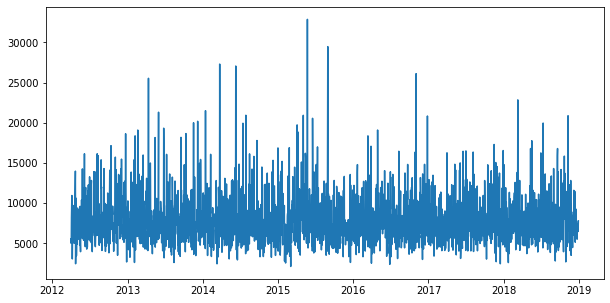

In [14]:
plt.figure(figsize=(10,5))
plt.plot(dataCLV['EnrollmentDateOpening'],dataCLV['Customer Lifetime Value'])

In [35]:
dataCLV.set_index(dataCLV['EnrollmentDateOpening'],inplace=True)
dataCLV_ts = dataCLV['Customer Lifetime Value']
dataCLV_ts.head()

EnrollmentDateOpening
2012-04-01     5550.056154
2012-04-02     4992.920000
2012-04-03     8193.278529
2012-04-05    10951.966667
2012-04-07     3058.970000
Name: Customer Lifetime Value, dtype: float64

`Check Trend Data`

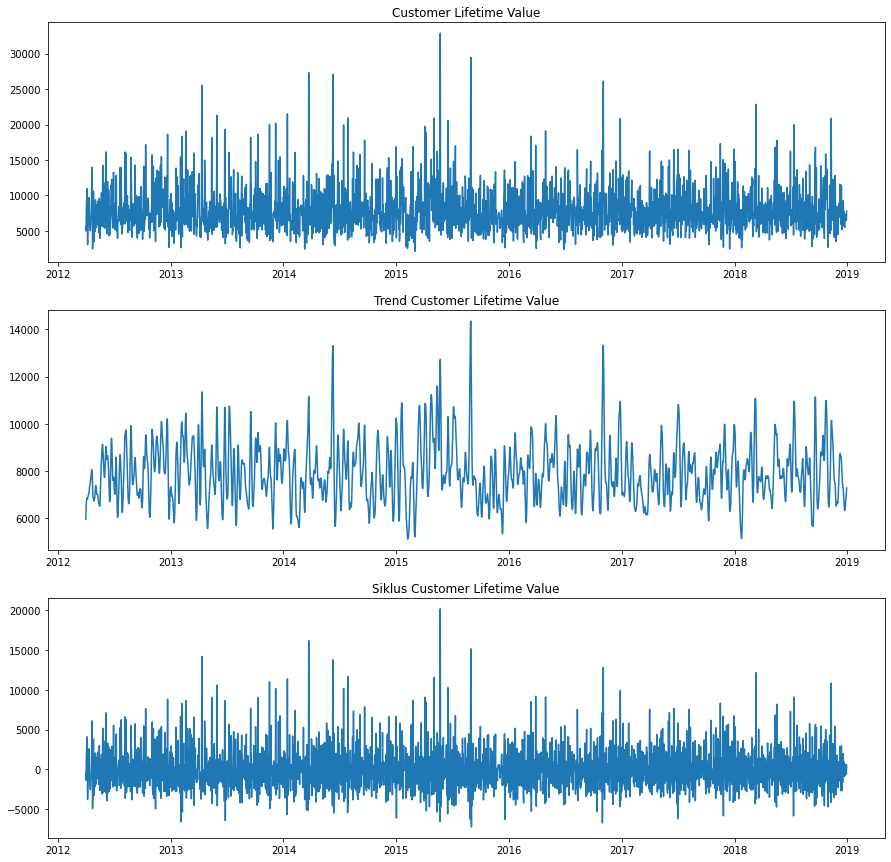

In [16]:
cycle, trend = sm.tsa.filters.hpfilter(dataCLV_ts, 12)
fig, ax = plt.subplots(3,1,figsize=(15,15))
ax[0].plot(dataCLV_ts)
ax[0].set_title('Customer Lifetime Value')
ax[1].plot(trend)
ax[1].set_title('Trend Customer Lifetime Value')
ax[2].plot(cycle)
ax[2].set_title('Siklus Customer Lifetime Value')
plt.show()

`Check Stasioner Data`

In [17]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(dataCLV['Customer Lifetime Value'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -48.535925793533245
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2445
5. Critical Values :
	 1% :  -3.4330273737125445
	 5% :  -2.8627228377894505
	 10% :  -2.567399672341618



    p-value > 0.05 - This implies that time-series is non-stationary.
    p-value <=0.05 - This implies that time-series is stationary.


*data termasuk data stasioner*

`Orde Auto Regresive dan Orde Moving Average`

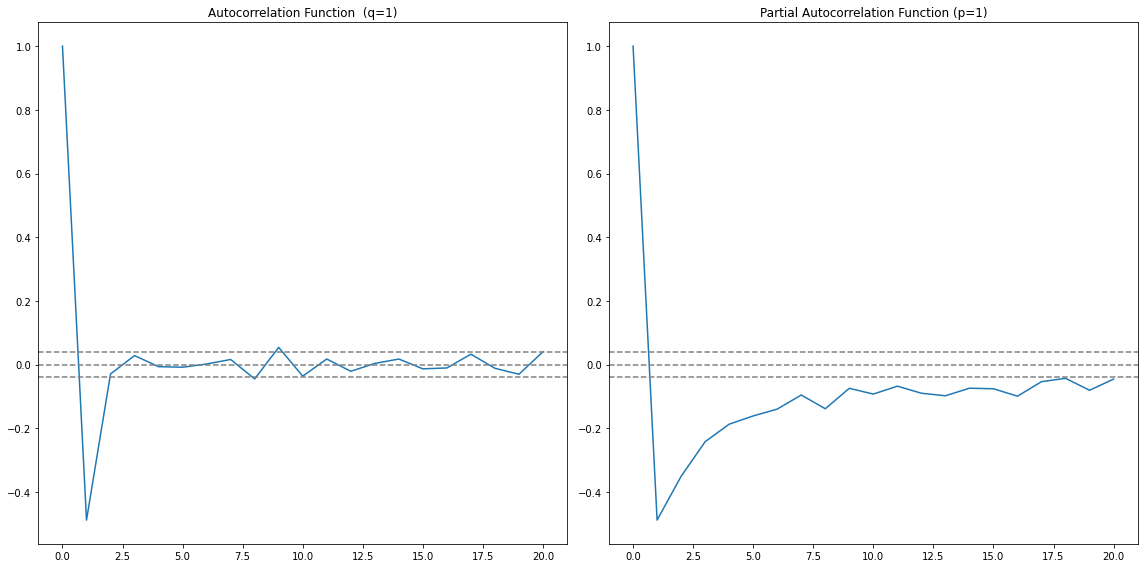

In [18]:
from statsmodels.tsa.stattools import acf, pacf

dataCLV_ts = dataCLV['Customer Lifetime Value'].astype(float)
x_diff = dataCLV_ts.diff().dropna()

# ACF and PACF plot:
lag_acf = acf(x_diff, nlags=20, fft=True)
lag_pacf = pacf(x_diff, nlags=20, method='ols')

plt.figure(figsize=(16,8))

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function  (q=1)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (p=1)')
plt.tight_layout()

#Split data train dan data test

In [19]:
import math
total_size=len(dataCLV_ts)
train_size=math.floor(0.7*total_size)
train=dataCLV_ts.head(train_size)
test=dataCLV_ts.tail(len(dataCLV_ts)-train_size)

In [29]:
print('data train:',train.shape)
print('data test:',test.shape)

data train: (1712,)
data test: (734,)


# Model ARMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          7985.4651     80.753     98.887      0.000    7827.192    8143.738
ar.L1.Customer Lifetime Value     0.1392      1.183      0.118      0.906      -2.179       2.457
ma.L1.Customer Lifetime Value    -0.1055      1.188     -0.089      0.929      -2.434       2.223


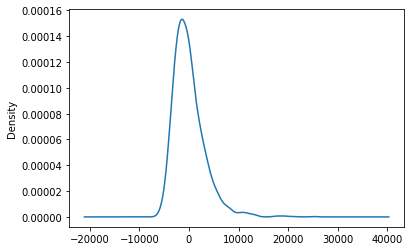

In [47]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(train, order=(1, 1)).fit()
model.resid.plot(kind='kde')
print(model.summary().tables[1])

`terlihat error data berdistribusi normal`

In [44]:
ARMApredict = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


`Model Prediksi`

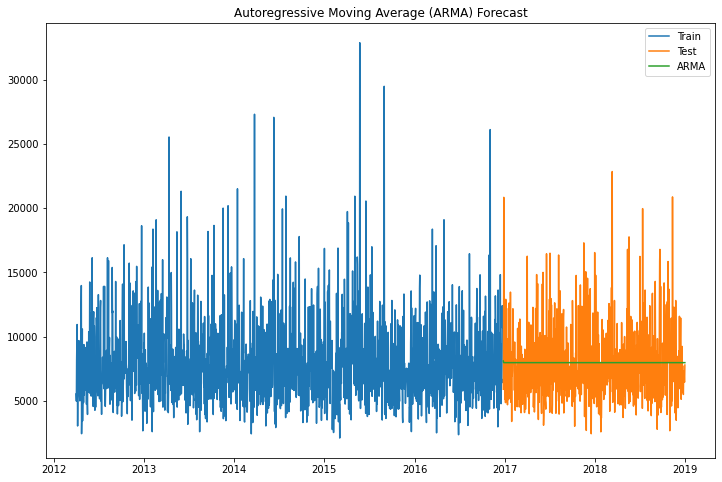

In [23]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(test.index,ARMApredict, label='ARMA')
plt.legend(loc='best')
plt.title("Autoregressive Moving Average (ARMA) Forecast")
plt.show()

`Evaluasi Model`

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, ARMApredict))
print('RMSE = '+str(rmse))

RMSE = 2858.9026122296227


#Pola Customer Enroll dan Cancel dalam Mingguan

In [30]:
enroll  = data1.copy()

enroll['EnrollmentDateOpening'] = pd.to_datetime(enroll['EnrollmentDateOpening'])
enroll['EnrollmentDateOpening'] = enroll['EnrollmentDateOpening'].astype('datetime64[ns]')
enroll['weekofyear'] = enroll['EnrollmentDateOpening'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


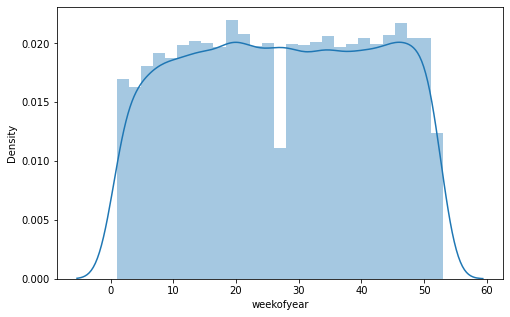

In [31]:
plt.figure(figsize=(8, 5))
sns.distplot(enroll['weekofyear'])
plt.show()

<Figure size 576x360 with 0 Axes>

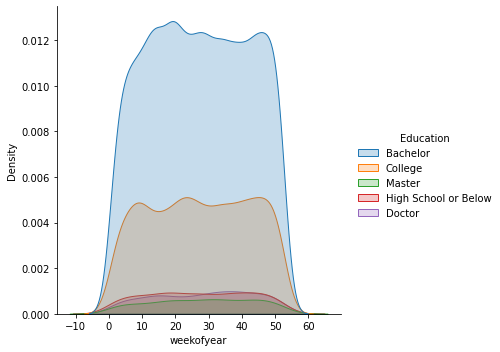

In [32]:
plt.figure(figsize=(8, 5))
sns.displot(enroll, x='weekofyear', hue='Education', kind='kde', fill=True)

In [ ]:
data_non_cust = data1[data1['CancellationDate'].notnull()]

In [ ]:
data_non_cust['CancellationDate'] = pd.to_datetime(data_non_cust['CancellationDate'])
data_non_cust['CancellationDate'] = data_non_cust['CancellationDate'].astype('datetime64[ns]')
data_non_cust.info()

In [ ]:
cancel  = data_non_cust.copy()

cancel['CancellationDate'] = pd.to_datetime(cancel['CancellationDate'])
cancel['CancellationDate'] = cancel['CancellationDate'].astype('datetime64[ns]')
cancel['weekofyear'] = cancel['CancellationDate'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


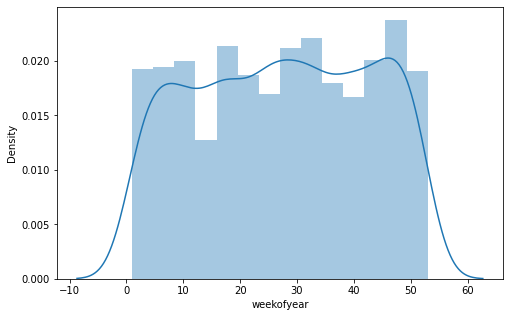

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(cancel['weekofyear'])
plt.show()

<Figure size 576x360 with 0 Axes>

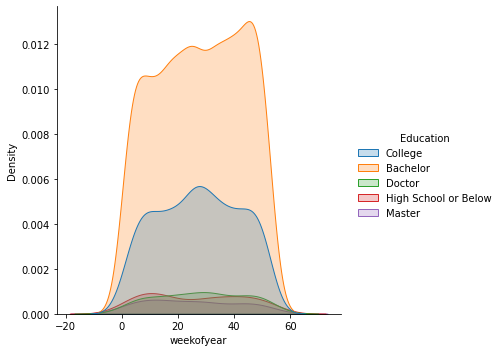

In [ ]:
plt.figure(figsize=(8, 5))
sns.displot(cancel, x='weekofyear', hue='Education', kind='kde', fill=True)